# Load data

## library & load data

In [1]:
import pandas as pd 
import numpy as np 

train = pd.read_csv('dataset/train.csv', index_col = 'id')
test = pd.read_csv('dataset/test.csv', index_col = 'id')
submission = pd.read_csv('dataset/sample_submission.csv', index_col = 'id')

# Feature Engineering 

피처 특성에 맞게 인코딩해서 성능 개선 
- 이진 피처 > 순서형 피처 > 명목형 피처 > 날짜 피처 순으로 진행 

## concat data 

In [2]:
all_data = pd.concat([train, test], ignore_index = True) 
all_data = all_data.drop('target', axis = 1) 

## 이진 피처 인코딩

bin_0 ~ bin_2는 이미 0과 1로만 구성되어있기 때문에 따로 인코딩하지 않아도 됨 

In [3]:
all_data['bin_3'] = all_data['bin_3'].map({'F' : 0, 'T' : 1})
all_data['bin_4'] = all_data['bin_4'].map({'N' : 0, 'Y' : 1})

## 순서형 피처 인코딩 

In [4]:
all_data['ord_1'].unique()

array(['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master'],
      dtype=object)

In [5]:
for i in range(6) : 
    feature = 'ord_' + str(i)
    print(f'{feature} 고유값 :  {all_data[feature].unique()}')

ord_0 고유값 :  [2 1 3]
ord_1 고유값 :  ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고유값 :  ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
ord_3 고유값 :  ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고유값 :  ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고유값 :  ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' '

In [6]:
all_data['ord_1'] = all_data['ord_1'].map({'Novice' : 0, 'Contributor' : 1,
                                           'Expert' : 2, 'Master' : 3, 'Grandmaster' : 4})

all_data['ord_2'] = all_data['ord_2'].map({'Freezing' : 0, 'Cold' : 1,
                                           'Warm' : 2, 'Hot' : 3, 
                                           'Boiling Hot' : 4, 'Lava Hot' : 5})

ord_3~ord_5는 사이킷런의 `OrdinalEncoder` 이용 

In [7]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']
ord_encoder = OrdinalEncoder()

all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# 피처별 인코딩 순서 출력 
for feature, categories in zip(ord_345, ord_encoder.categories_) : 
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

## 명목형 피처 인코딩 
- 순서를 무시해도 되기 때문에 원-핫 인코딩 적용 

In [8]:
nom_features = ['nom_' + str(i) for i in range(10)]

In [9]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

In [10]:
encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

기존의 명목형 변수는 삭제

In [11]:
all_data.drop(nom_features, axis = 1, inplace = True)

## 날짜 피처 인코딩 

In [12]:
date_features = ['day', 'month'] 

encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data.drop(date_features, axis = 1, inplace = True)

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

## 피처 스케일링 
- 이진, 명목형, 날짜 피처는 모두 0과 1로 인코딩했지만 순서형 변수는 여러 값을 갖기 떄문에 0과 1사이의 범위의 값을 갖도록 스케일링을 수행해줘야 함 

In [13]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)] 

minmax_scaler = MinMaxScaler()

all_data[ord_features] = minmax_scaler.fit_transform(all_data[ord_features])


## 인코딩 및 스케일링된 피처 합치기 

all_data는 DataFrame이고 encoded_nom_matrix와 encoded_date_matrix는 CSR 형식의 파일이기 때문에 형식을 맞춰줘야 한다.

> all_data를 CSR형식으로 변환(scipy의 `scr_matrix`이용)

In [14]:
from scipy import sparse

In [15]:
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                               encoded_nom_matrix,
                               encoded_date_matrix], format = 'csr')

500000 $\times$ 16306 크기의 데이터를 DataFrame형태로 처리하면 메모리 낭비가 심하고 훈련 속도도 떨어진다. 따라서 CSR 형식의 파일을 그대로 이용

In [16]:
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

## data split 

In [17]:
import copy

In [18]:
X_train = all_data_sprs[:len(train)]
X_test = all_data_sprs[len(train):]

y = train['target']

X_total = copy.deepcopy(X_train)

## train/valid split 

In [19]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, 
                                                      test_size = 0.1,
                                                      stratify = y,
                                                      random_state = 10)

## 하이퍼 파라미터 최적화

In [20]:
%%time 

from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 

# 모델 생성
logistic_model = LogisticRegression()

# 하이퍼파라미터 목록
lr_params = {'C' : [0.1, 0.125, 0.15], 
             'max_iter' : [700, 800, 900], 
             'solver' : ['liblinear'], 
             'random_state' : [42]}

# 그리드서치 객체 생성 
gridsearch_logistic_model = GridSearchCV(estimator = logistic_model, 
                                         param_grid = lr_params, 
                                         scoring = 'roc_auc', 
                                         cv = 5, 
                                         verbose = 1)

# 그리드서치 수행 
gridsearch_logistic_model.fit(X_train, y_train)

print(f'최적 하이퍼 파라미터 : {gridsearch_logistic_model.best_params_}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.3min finished


최적 하이퍼 파라미터 : {'C': 0.125, 'max_iter': 700, 'random_state': 42, 'solver': 'liblinear'}
Wall time: 4min 27s


## 모델 성능 검증 (ROC-AUC)

In [22]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'valid data ROC-AUC : {roc_auc:.4f}')

valid data ROC-AUC : 0.8045


# 성능 개선 
- valid set이 전체 훈련 데이터의 10%를 차지한다. 이를 검증용으로만 사용하면 그만큼의 데이터를 낭비하는 것이기 때문에 모델링 절차를 그대로 유지한 채로 훈련 데이터 전체를 사용해서 모델을 훈련

In [27]:
logistic_model = LogisticRegression(C = 0.125, max_iter = 700, 
                                    random_state =  42, solver = 'liblinear')


In [30]:
from sklearn.metrics import roc_auc_score

logistic_model.fit(X_total, y)

y_total_preds = logistic_model.predict_proba(X_total)[:, 1]

roc_auc = roc_auc_score(y, y_total_preds)

print(f'valid data ROC-AUC : {roc_auc:.4f}')

valid data ROC-AUC : 0.8276


In [32]:
y_preds = logistic_model.predict_proba(X_test)[:, 1]
submission['target'] = y_preds
submission.to_csv('submission.csv')

# 결과

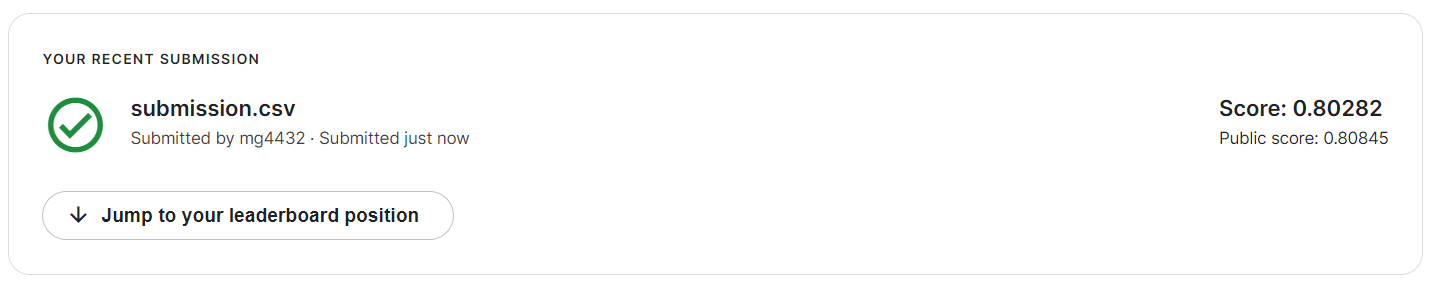

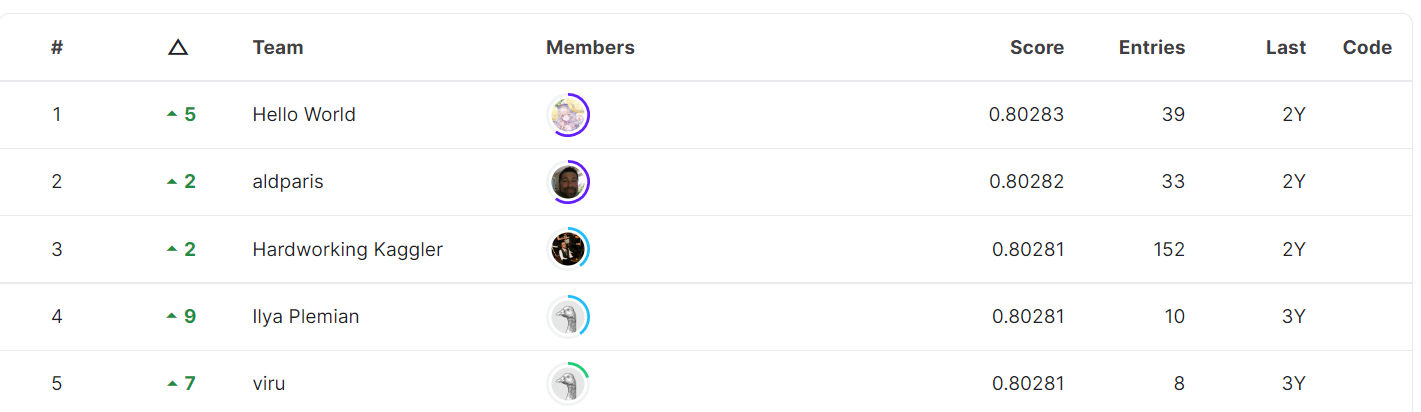

# LightGBM

In [ ]:
%%time 

from sklearn.model_selection import GridSearchCV 
from lightgbm import LGBMClassifier

# 모델 생성
lgbm = LGBMClassifier(n_jobs = -1, random_state = 42)

# 하이퍼파라미터 목록
lgbm_params = {'n_estimators' : [300, 500, 700], 
             'max_depth' : [5, 8, 10],
             'learning_rate' : [0.001, 0.003, 0.01]}

# 그리드서치 객체 생성 
gridsearch_lgbm_model = GridSearchCV(estimator = lgbm, 
                                         param_grid = lgbm_params, 
                                         scoring = 'roc_auc', 
                                         cv = 5, 
                                         verbose = 1)

# 그리드서치 수행 
gridsearch_lgbm_model.fit(X_train, y_train)

print(f'최적 하이퍼 파라미터 : {gridsearch_lgbm_model.best_params_}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
y_valid_preds_lgbm = gridsearch_lgbm_model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds_lgbm)

print(f'valid data ROC-AUC : {roc_auc:.4f}')